In [1]:
import pandas as pd
import unicodedata
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import math

In [2]:
df = pd.read_excel(
    './CONCEDIDOS+DADOS+ABERTOS_OUTUBRO+2025.xlsx',
    header=1   
)

In [3]:
print('Primeiras 5 colunas de dados:\n')
df.head()

Primeiras 5 colunas de dados:



,APS,APS.1,Competência concessão,Espécie,Espécie.1,CID,CID.1,Despacho,Despacho.1,Dt Nascimento,...,Qt SM RMI,Ramo Atividade,Dt DCB,Dt DDB,Dt DIB,País de Acordo Internacional,Classificador PA,CNAE 2.0,CNAE 2.0.1,Grau Instrução
0,2001003,02001003-SADJ Maceio,202510,80,Auxílio Salario Maternidade,0,Zerados,4,Concessao Decorrente de Acao Judicial,2003-12-26,...,1.0,Rural,2022-11-24 00:00:00,2025-10-02,2022-07-28,{ñ class},Sem Pensâo Alimentícia,99990,{ñ class},Analfabeto
1,2001003,02001003-SADJ Maceio,202510,80,Auxílio Salario Maternidade,0,Zerados,4,Concessao Decorrente de Acao Judicial,1990-07-02,...,1.0,Rural,2023-04-19 00:00:00,2025-10-02,2022-12-21,{ñ class},Sem Pensâo Alimentícia,99990,{ñ class},Não Informado
2,2001003,02001003-SADJ Maceio,202510,80,Auxílio Salario Maternidade,0,Zerados,4,Concessao Decorrente de Acao Judicial,1997-03-05,...,1.0,Rural,2023-09-04 00:00:00,2025-10-02,2023-05-08,{ñ class},Sem Pensâo Alimentícia,99990,{ñ class},Não Informado
3,2001003,02001003-SADJ Maceio,202510,80,Auxílio Salario Maternidade,0,Zerados,4,Concessao Decorrente de Acao Judicial,1994-02-27,...,1.0,Rural,2024-01-29 00:00:00,2025-10-03,2023-10-02,{ñ class},Sem Pensâo Alimentícia,99990,{ñ class},Não Informado
4,2001003,02001003-SADJ Maceio,202510,80,Auxílio Salario Maternidade,0,Zerados,4,Concessao Decorrente de Acao Judicial,1997-05-11,...,1.0,Rural,2025-07-11 00:00:00,2025-10-02,2025-03-14,{ñ class},Sem Pensâo Alimentícia,99990,{ñ class},Não Informado


## Tratamento dos dados

In [4]:
df['Competência concessão'].value_counts()

Competência concessão
202510    667690
Name: count, dtype: int64

In [5]:
df.dtypes

APS                                      int64
APS.1                                   object
Competência concessão                    int64
Espécie                                  int64
Espécie.1                               object
CID                                     object
CID.1                                   object
Despacho                                 int64
Despacho.1                              object
Dt Nascimento                   datetime64[ns]
Sexo.                                   object
Clientela                               object
Mun Resid                               object
Vínculo dependentes                     object
Forma Filiação                          object
UF                                      object
Qt SM RMI                              float64
Ramo Atividade                          object
Dt DCB                                  object
Dt DDB                          datetime64[ns]
Dt DIB                          datetime64[ns]
País de Acord

In [6]:
lista_beneficios = df['Espécie.1'].unique()
# benefícios
print(lista_beneficios)
# total benefícios
print(f'\nnúmero de benefícios: {lista_beneficios.__len__()}')

['Auxílio Salario Maternidade' 'Auxílio Doenca Previdenciário'
 'Auxílio Doenca por Acidente do Trabalho'
 'Aposentadoria Invalidez Previdenciária'
 'Auxílio Acidente Previdenciário' 'Auxílio Acidente'
 'Pensão por Morte Previdenciária' 'Aposentadoria por Idade'
 'Aposentadoria por Tempo de Contribuição'
 'Amp. Social Pessoa Portadora Deficiencia' 'Auxílio Reclusão'
 'Aposent. Tempo de Serviço de Professor' 'Amparo Social ao Idoso'
 'Aposent. Invalidez Acidente Trabalho'
 'Pensão por Morte Acidente do Trabalho' 'Aposentadoria Especial'
 'Pensao Especial Hanseniase Lei 11520/07' 'Pensão por Morte Ex-Sasse'
 'Auxílio Inclusão À Pessoa com Deficiência'
 'Pensão Vitalícia Sindrome Talidomida'
 'Benefício Indenizatório a Cargo da União'
 'Auxílio Suplementar Acidente Trabalho' 'Pensão por Morte de Anistiados'
 'Pensão Vitalícia Dependentes Seringueiro'
 'Pensão Vitalícia Seringueiros']

número de benefícios: 25


In [7]:
lista_aposentadorias = [beneficio for beneficio in df['Espécie.1'].dropna().unique() if 'apos' in beneficio.lower()]

In [8]:
# filtra só aposentadorias
mask_apos = (
    df["Espécie.1"]
    .dropna()
    .str.lower()
    .str.contains("apos")
)

# contagem das espécies
contagem_aposentadorias = df["Espécie.1"][mask_apos].value_counts()

# ajustar nomes das colunas
tabela_contagem_aposentadorias = (
    contagem_aposentadorias
    .reset_index()
    .rename(columns={"Espécie.1": "Espécie"})
)

tabela_contagem_aposentadorias

,Espécie,count
0,Aposentadoria por Idade,88856
1,Aposentadoria Invalidez Previdenciária,19400
2,Aposentadoria por Tempo de Contribuição,19389
3,Aposentadoria Especial,1085
4,Aposent. Tempo de Serviço de Professor,871
5,Aposent. Invalidez Acidente Trabalho,639


In [9]:
# filtrar aposentadorias
df_aposentadorias = df.loc[
    df['Espécie.1'].isin(['Aposentadoria por Idade', 'Aposentadoria por Tempo de Contribuição'])
].copy().reset_index(drop=True)

In [10]:
print(f'total de casos filtrados: {df_aposentadorias.shape[0]}')

total de casos filtrados: 108245


In [11]:
def calcular_idade(data_nascimento, data_despacho):
    if pd.isna(data_nascimento) or pd.isna(data_despacho):
        return None
    
    idade = data_despacho.year - data_nascimento.year

    # Se ainda não houve aniversário no ano da data de despacho
    if (data_despacho.month, data_despacho.day) < (data_nascimento.month, data_nascimento.day):
        idade -= 1

    return idade

df_aposentadorias["idade"] = [
    calcular_idade(data_nascimento, data_despacho)
    for data_nascimento, data_despacho in zip(
        df_aposentadorias["Dt Nascimento"],
        df_aposentadorias["Dt DDB"]
    )
]

In [12]:
# idade beneficiário < 50
df_aposentadorias.loc[:, "idade_menor_50"] = (
    df_aposentadorias["idade"] < 50
)


print(
    f"total de casos filtrados com idade menor que 50:\n"
    f"{df_aposentadorias[df_aposentadorias['idade'] < 50].shape[0]}"
)

total de casos filtrados com idade menor que 50:
590


In [13]:
df_aposentadorias[['idade_menor_50', 'Classificador PA']].value_counts()

idade_menor_50  Classificador PA                       
False           Sem Pensâo Alimentícia                     107542
True            Sem Pensâo Alimentícia                        321
                Com Pensão - Titular Pensão Alimentícia       269
False           Com Pensão - Titular Pensão Alimentícia       113
Name: count, dtype: int64

In [14]:
df_aposentadorias = df_aposentadorias[df_aposentadorias['Classificador PA'] == 'Sem Pensâo Alimentícia']

In [15]:
df_aposentadorias[df_aposentadorias['idade_menor_50'] == True].shape[0]

321

In [16]:
df_aposentadorias = df_aposentadorias.copy()

# flag concessão normal
df_aposentadorias.loc[:, "concessao_normal"] = (
    df_aposentadorias["Despacho.1"] == "Concessao Normal"
)

# value_counts das duas flags juntas
vc_flags = df_aposentadorias[["idade_menor_50", "concessao_normal"]].value_counts()

vc_flags


idade_menor_50  concessao_normal
False           True                82064
                False               25478
True            False                 285
                True                   36
Name: count, dtype: int64

In [17]:
df_aposentadorias['Despacho.1'].unique()

array(['Concessao Normal', 'Concessao Decorrente de Acao Judicial',
       'Concessao em Fase Recursal',
       'Concessao com Conversao Tempo de Servico',
       'Conc. com Base Artigo 35 da Lei 8213/91',
       'Conc. s/Verificacao da Perda Qualidade',
       'Conc. com Base no Artigo 180 do Rbps',
       'Conc. com Base no Artigo 183 do Rbps',
       'Concessao com Diligencia (Rd ou Sp)'], dtype=object)

In [18]:
print(f'concessões não normais removidos: {df_aposentadorias[df_aposentadorias["concessao_normal"] == False].shape[0]}')

concessões não normais removidos: 25763


In [19]:
df_aposentadorias = df_aposentadorias[df_aposentadorias['Despacho.1'] == 'Concessao Normal']

In [20]:
df_aposentadorias[df_aposentadorias['idade_menor_50'] == True].shape[0]

36

In [21]:
df_aposentadorias.loc[
    df_aposentadorias['idade'] < 50,
    ['Sexo.', 'Espécie.1']
].value_counts()


Sexo.      Espécie.1                              
Feminino   Aposentadoria por Tempo de Contribuição    33
Masculino  Aposentadoria por Tempo de Contribuição     3
Name: count, dtype: int64

In [22]:
df_aposentadorias[df_aposentadorias['Qt SM RMI'] < 1].shape[0]

74

In [23]:
df_aposentadorias = df_aposentadorias[df_aposentadorias['Qt SM RMI'] >= 1]

In [24]:
def classificar_grau(grau):
    if pd.isna(grau):
        return np.nan
    
    s = grau.lower().strip()

    # nível 2 = superior completo
    if "superior completo" in s:
        return 2
    
    # nível 1 = segundo grau completo ou superior incompleto
    elif "colegial completo" in s or "superior incompleto" in s:
        return 1

    # NA
    elif "não informado" in s:
        return np.nan

    # nível 0 = abaixo do segundo grau
    else:
        return 0


# criar coluna numérica
df_aposentadorias["grau_simplificado_indice"] = (
    df_aposentadorias["Grau Instrução"].apply(classificar_grau)
)

# criar coluna com rótulos
df_aposentadorias["grau_simplificado"] = (
    df_aposentadorias["grau_simplificado_indice"]
    .map({
        2: "Superior completo",
        1: "Segundo grau completo",
        0: "Abaixo do segundo grau"
    })
)

df_aposentadorias.loc[
    df_aposentadorias["grau_simplificado_indice"].isna(),
    "grau_simplificado"
] = "Não informado"


In [25]:
def carregar_tabua(caminho_arquivo):
    """
    Lê a tábua de mortalidade (IBGE), remove linhas não numéricas
    e renomeia as colunas para nomes consistentes.
    """
    
    tabua_crua = pd.read_excel(caminho_arquivo, header=None)

    mascara = tabua_crua[0].apply(
        lambda x: isinstance(x, (int, float)) 
                   and not (isinstance(x, float) and math.isnan(x))
    )
    
    tabua_limpa = tabua_crua.loc[mascara].reset_index(drop=True)

    # renomeia as colunas com nomes consistentes IBGE
    tabua_limpa.columns = [
        "idade",                
        "Q(x,n)_por_mil",       
        "D(x,n)",               
        "l(x)",                 
        "L(x,n)",               
        "T(x)",                 
        "expectativa_sobrevida"      
    ]
    
    return tabua_limpa

In [26]:
caminho_tabua_homens = "./homens.xlsx"
tabua_homens = carregar_tabua(caminho_tabua_homens)
tabua_homens.head()

,idade,"Q(x,n)_por_mil","D(x,n)",l(x),"L(x,n)",T(x),expectativa_sobrevida
0,0,13.47192,1347.191985,100000,98817.280901,7313912.566582,73.139126
1,1,0.795731,78.501116,98652.808015,98613.557457,7215095.285681,73.136238
2,2,0.636151,62.708095,98574.306898,98542.952851,7116481.728224,72.194083
3,3,0.510515,50.291693,98511.598803,98486.452957,7017938.775373,71.239721
4,4,0.413032,40.667665,98461.30711,98440.973278,6919452.322416,70.275853


In [27]:
caminho_tabua_mulheres = "./mulheres.xlsx"
tabua_mulheres = carregar_tabua(caminho_tabua_mulheres)
tabua_mulheres.head()

,idade,"Q(x,n)_por_mil","D(x,n)",l(x),"L(x,n)",T(x),expectativa_sobrevida
0,0,11.417944,1141.794418,100000,99001.302467,7966786.24409,79.667862
1,1,0.725672,71.738603,98858.205582,98822.336281,7867784.941622,79.586564
2,2,0.566926,56.004572,98786.466979,98758.464693,7768962.605342,78.643997
3,3,0.445971,44.030972,98730.462408,98708.446921,7670204.140648,77.688324
4,4,0.355971,35.129502,98686.431435,98668.866684,7571495.693727,76.722763


In [28]:
# garantir que as idades sejam inteiras
tabua_homens["idade"] = tabua_homens["idade"].astype(int)
tabua_mulheres["idade"] = tabua_mulheres["idade"].astype(int)

# mapeamentos idade -> expectativa_sobrevida
mapa_homens = tabua_homens.set_index("idade")["expectativa_sobrevida"]
mapa_mulheres = tabua_mulheres.set_index("idade")["expectativa_sobrevida"]

df_aposentadorias = df_aposentadorias.copy()
df_aposentadorias["expectativa_sobrevida"] = np.nan

mask_h = df_aposentadorias["Sexo."] == "Masculino"
mask_m = df_aposentadorias["Sexo."] == "Feminino"

df_aposentadorias.loc[mask_h, "expectativa_sobrevida"] = (
    df_aposentadorias.loc[mask_h, "idade"].map(mapa_homens)
)

df_aposentadorias.loc[mask_m, "expectativa_sobrevida"] = (
    df_aposentadorias.loc[mask_m, "idade"].map(mapa_mulheres)
)


In [29]:
df_aposentadorias[["Sexo.", "idade", "expectativa_sobrevida"]].head()

,Sexo.,idade,expectativa_sobrevida
0,Feminino,62,22.36982
1,Feminino,59,24.868535
2,Feminino,62,22.36982
3,Masculino,64,17.84274
4,Feminino,60,24.027616


In [30]:
def norm(s):
    if pd.isna(s):
        return s
    s = str(s).strip().lower()
    s = unicodedata.normalize("NFKD", s)
    return "".join(c for c in s if not unicodedata.combining(c))

def criar_regiao(df, uf_col="UF", reg_col="Região"):
    df = df.copy()
    df[reg_col] = df[uf_col].apply(lambda x: mapa_regioes_nomes.get(norm(x), None))
    return df


# mapeia tanto siglas quanto nomes completos (normalizados)
mapa_regioes_nomes = {
    # Norte
    "acre": "Norte",
    "amapa": "Norte",
    "amazonas": "Norte",
    "para": "Norte",
    "rondonia": "Norte",
    "roraima": "Norte",
    "tocantins": "Norte",

    # Nordeste
    "alagoas": "Nordeste",
    "bahia": "Nordeste",
    "ceara": "Nordeste",
    "maranhao": "Nordeste",
    "paraiba": "Nordeste",
    "pernambuco": "Nordeste",
    "piaui": "Nordeste",
    "rio grande do norte": "Nordeste",
    "sergipe": "Nordeste",

    # Centro-Oeste
    "distrito federal": "Centro-Oeste",
    "goias": "Centro-Oeste",
    "mato grosso": "Centro-Oeste",
    "mato grosso do sul": "Centro-Oeste",

    # Sudeste
    "sao paulo": "Sudeste",
    "rio de janeiro": "Sudeste",
    "espirito santo": "Sudeste",
    "minas gerais": "Sudeste",

    # Sul
    "parana": "Sul",
    "rio grande do sul": "Sul",
    "santa catarina": "Sul"
}

# aplicar
df_aposentadorias = criar_regiao(df_aposentadorias, uf_col="UF", reg_col="Região")

In [31]:
bins = [0, 2, 4, float("inf")]
labels_sal = ["[0,2)", "[2,4)", "4+"]

df_aposentadorias["grupo_renda"] = pd.cut(
    df_aposentadorias["Qt SM RMI"],
    bins=bins,
    labels=labels_sal,
    right=False
)

## Resultados

### Visualizações

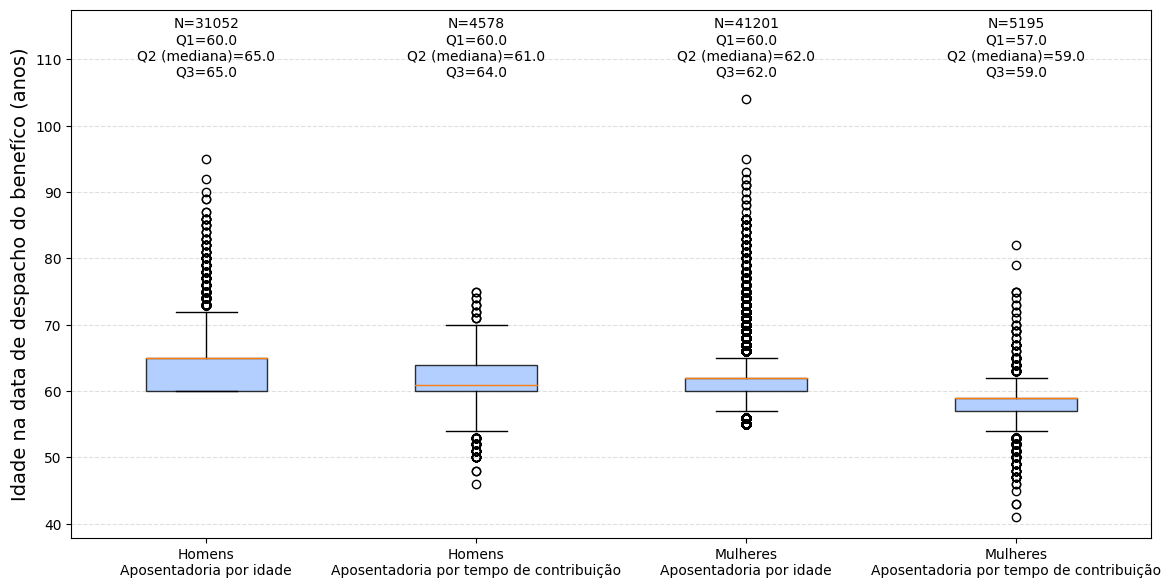

In [32]:
def plot_box_sexo_especie(df):

    grupos = [
        ("Homens\nAposentadoria por idade",
         (df["Sexo."] == "Masculino") & (df["Espécie.1"] == "Aposentadoria por Idade")),

        ("Homens\nAposentadoria por tempo de contribuição",
         (df["Sexo."] == "Masculino") & (df["Espécie.1"] == "Aposentadoria por Tempo de Contribuição")),

        ("Mulheres\nAposentadoria por idade",
         (df["Sexo."] == "Feminino") & (df["Espécie.1"] == "Aposentadoria por Idade")),

        ("Mulheres\nAposentadoria por tempo de contribuição",
         (df["Sexo."] == "Feminino") & (df["Espécie.1"] == "Aposentadoria por Tempo de Contribuição")),
    ]

    labels = [g[0] for g in grupos]
    data = [df[g[1]]["idade"].dropna() for g in grupos]

    stats = []
    for serie in data:
        N = len(serie)
        Q1 = serie.quantile(0.25)
        Q2 = serie.quantile(0.50)
        Q3 = serie.quantile(0.75)
        stats.append((N, Q1, Q2, Q3))

    plt.figure(figsize=(12, 6))
    box = plt.boxplot(data, labels=labels, patch_artist=True)

    for patch in box["boxes"]:
        patch.set(facecolor="#A0C4FF", alpha=0.8)

    plt.ylabel("Idade na data de despacho do benefíco (anos)", fontsize=14)
    plt.grid(axis="y", linestyle="--", alpha=0.4)

    y_max = max(s.max() for s in data if len(s) > 0)
    y_fixed = y_max + 3

    for i, (N, Q1, Q2, Q3) in enumerate(stats, start=1):
        texto = (
            f"N={N}\n"
            f"Q1={Q1:.1f}\n"
            f"Q2 (mediana)={Q2:.1f}\n"
            f"Q3={Q3:.1f}"
        )
        plt.text(
            i, y_fixed, texto,
            ha="center", va="bottom", fontsize=10, color="black"
        )

    plt.ylim(top=117.5)
    plt.tight_layout()
    plt.show()

plot_box_sexo_especie(df_aposentadorias)

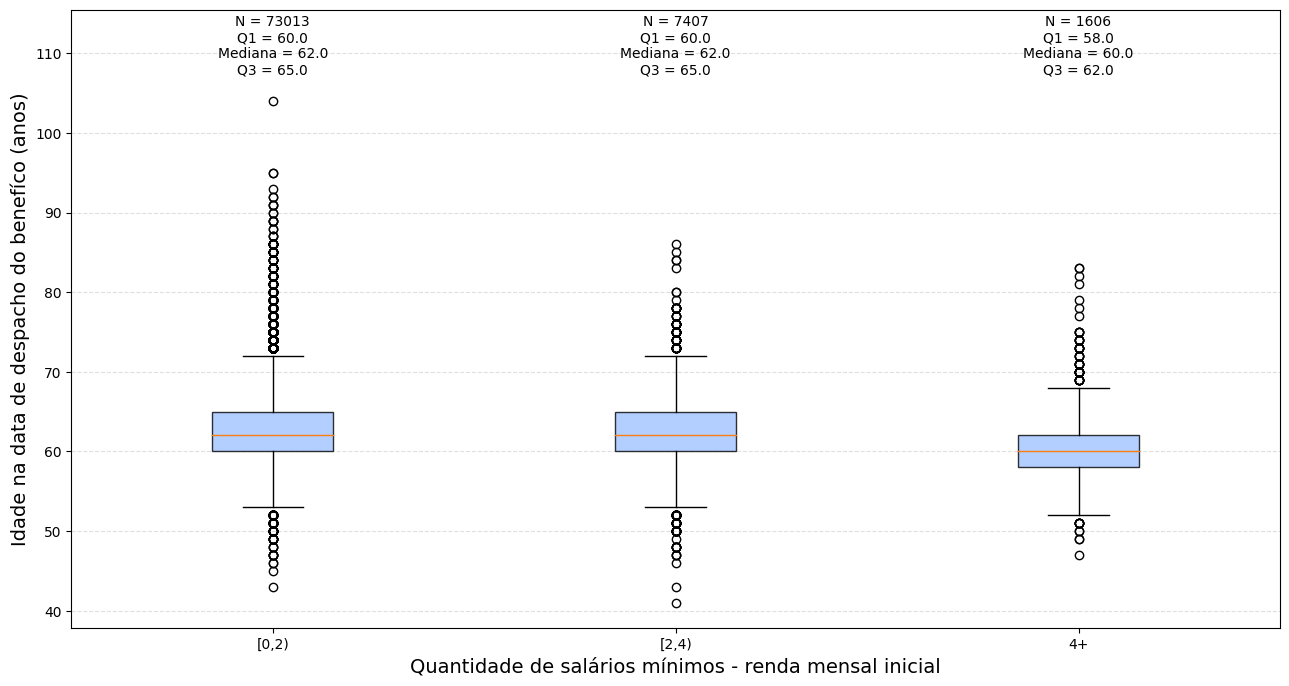

In [33]:

def plot_boxplot_idades_por_salario(df, labels, idade_col="idade"):

    data = [df[df["grupo_renda"] == g][idade_col].dropna() for g in labels]

    stats = []
    for serie in data:
        N = len(serie)
        Q1 = serie.quantile(0.25)
        Q2 = serie.quantile(0.50)
        Q3 = serie.quantile(0.75)
        stats.append((N, Q1, Q2, Q3))

    plt.figure(figsize=(13, 7))
    box = plt.boxplot(data, labels=labels, patch_artist=True)

    for patch in box["boxes"]:
        patch.set(facecolor="#A0C4FF", alpha=0.8)

    plt.xlabel("Quantidade de salários mínimos - renda mensal inicial", fontsize=14)
    plt.ylabel("Idade na data de despacho do benefíco (anos)", fontsize=14)
    plt.grid(axis="y", linestyle="--", alpha=0.4)

    top_whiskers = [max(serie) if len(serie) else 0 for serie in data]
    y_fixed = max(top_whiskers) + 3  

    for i, (N, Q1, Q2, Q3) in enumerate(stats, start=1):
        texto = (
            f"N = {N}\n"
            f"Q1 = {Q1:.1f}\n"
            f"Mediana = {Q2:.1f}\n"
            f"Q3 = {Q3:.1f}"
        )

        plt.text(
            i, y_fixed,
            texto,
            ha="center", va="bottom",
            fontsize=10
        )

    plt.ylim(top = 115.5)

    plt.tight_layout()
    plt.show()

labels_sal = ["[0,2)", "[2,4)", "4+"]

plot_boxplot_idades_por_salario(df_aposentadorias, labels_sal)


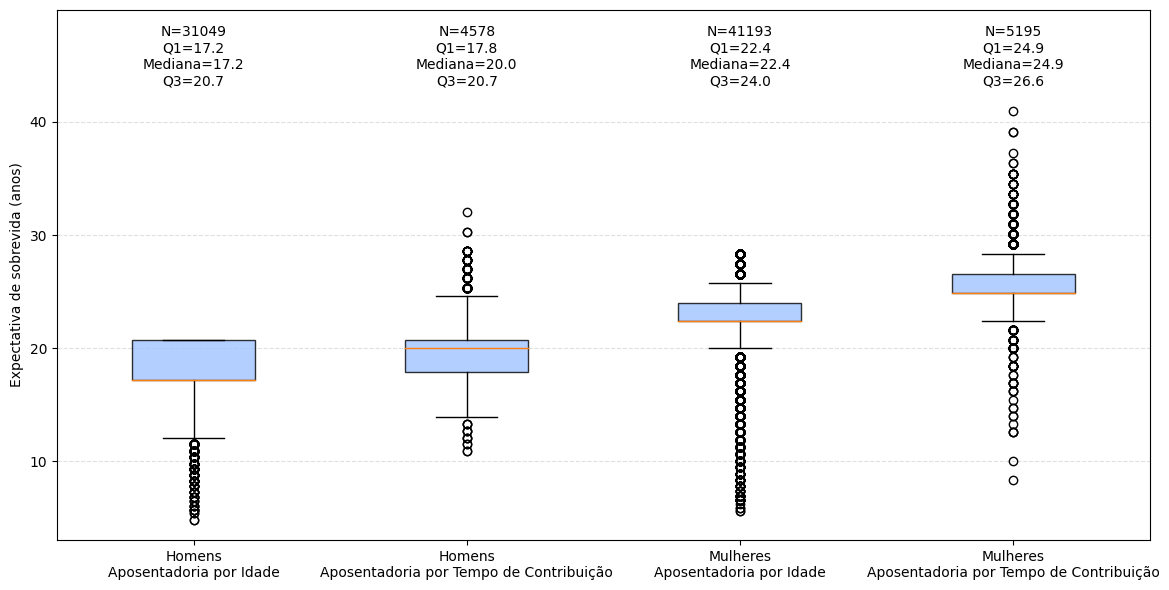

In [34]:
def plot_box_expectativa(df):
    grupos = [
        ("Homens\nAposentadoria por Idade",
         (df["Sexo."]=="Masculino") & (df["Espécie.1"]=="Aposentadoria por Idade")),

        ("Homens\nAposentadoria por Tempo de Contribuição",
         (df["Sexo."]=="Masculino") & (df["Espécie.1"]=="Aposentadoria por Tempo de Contribuição")),

        ("Mulheres\nAposentadoria por Idade",
         (df["Sexo."]=="Feminino") & (df["Espécie.1"]=="Aposentadoria por Idade")),

        ("Mulheres\nAposentadoria por Tempo de Contribuição",
         (df["Sexo."]=="Feminino") & (df["Espécie.1"]=="Aposentadoria por Tempo de Contribuição")),
    ]

    data = [df[filtro]["expectativa_sobrevida"].dropna() for _, filtro in grupos]
    labels = [nome for nome, _ in grupos]

    stats = []
    for serie in data:
        N = len(serie)
        Q1 = serie.quantile(0.25)
        Q2 = serie.quantile(0.50)
        Q3 = serie.quantile(0.75)
        stats.append((N, Q1, Q2, Q3))

    plt.figure(figsize=(12, 6))
    box = plt.boxplot(data, labels=labels, patch_artist=True)

    for patch in box["boxes"]:
        patch.set(facecolor="#A0C4FF", alpha=0.8)

    plt.ylabel("Expectativa de sobrevida (anos)")
    plt.grid(axis="y", linestyle="--", alpha=0.4)

    y_max = max(s.max() for s in data if len(s) > 0)
    y_fixed = 43

    for i, (N, Q1, Q2, Q3) in enumerate(stats, start=1):
        texto = (
            f"N={N}\n"
            f"Q1={Q1:.1f}\n"
            f"Mediana={Q2:.1f}\n"
            f"Q3={Q3:.1f}"
        )
        plt.text(
            i, y_fixed,
            texto,
            ha="center", va="bottom",
            fontsize=10, color="black"
        )

    plt.ylim(top=49.9)

    plt.tight_layout()
    plt.savefig('./figuras/box1_expectativa_sexo_espécie.png')
    plt.show()

plot_box_expectativa(df_aposentadorias)

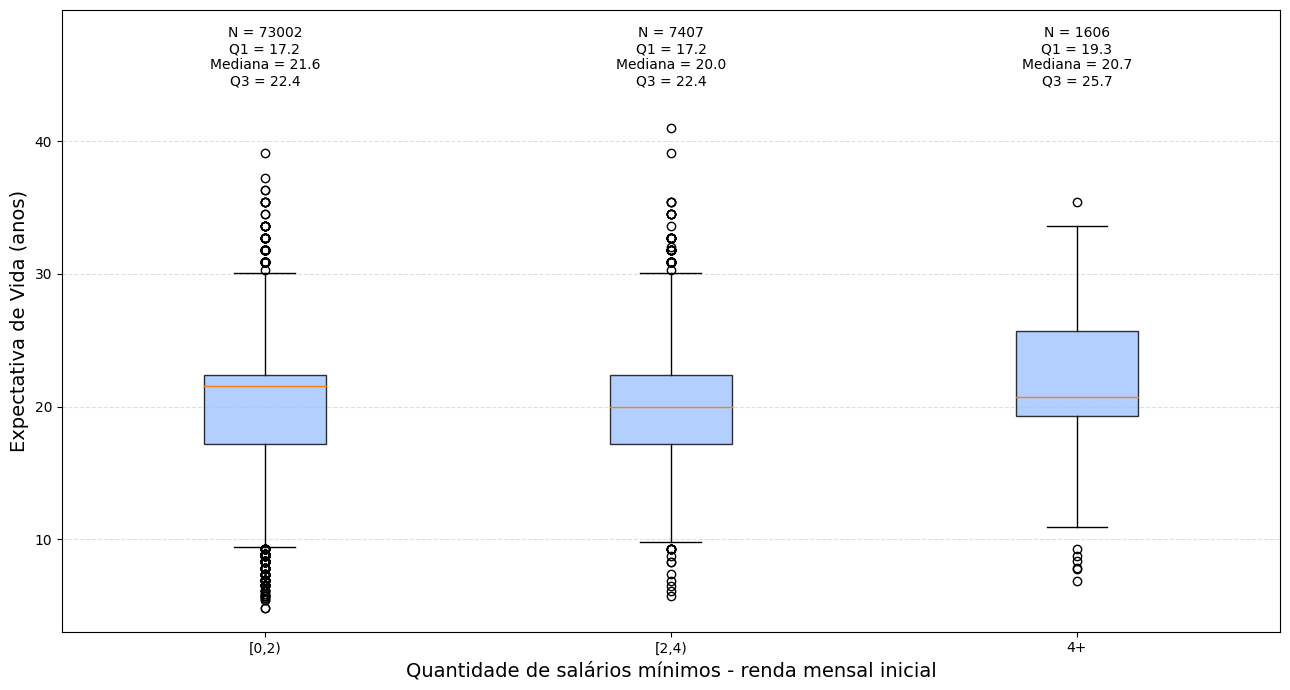

In [35]:
def plot_boxplot_expectativa_por_salario(df, labels, col="expectativa_sobrevida"):

    df = df.copy()
    df[col] = pd.to_numeric(df[col], errors="coerce")

    data = [df[df["grupo_renda"] == g][col].dropna() for g in labels]

    stats = []
    for serie in data:
        N = len(serie)
        Q1 = serie.quantile(0.25)
        Q2 = serie.quantile(0.50)
        Q3 = serie.quantile(0.75)
        stats.append((N, Q1, Q2, Q3))

    plt.figure(figsize=(13, 7))
    box = plt.boxplot(data, labels=labels, patch_artist=True)

    for patch in box["boxes"]:
        patch.set(facecolor="#A0C4FF", alpha=0.8)

    plt.xlabel("Quantidade de salários mínimos - renda mensal inicial", fontsize=14)
    plt.ylabel("Expectativa de Vida (anos)", fontsize=14)
    plt.grid(axis="y", linestyle="--", alpha=0.4)

    top_whiskers = [serie.max() if len(serie) else 0 for serie in data]
    y_fixed = max(top_whiskers) + 3

    for i, (N, Q1, Q2, Q3) in enumerate(stats, start=1):
        texto = (
            f"N = {N}\n"
            f"Q1 = {Q1:.1f}\n"
            f"Mediana = {Q2:.1f}\n"
            f"Q3 = {Q3:.1f}"
        )
        plt.text(
            i, y_fixed,
            texto,
            ha="center", va="bottom",
            fontsize=10
        )

    plt.ylim(top = 49.9)

    plt.tight_layout()
    plt.savefig('./figuras/box2_expectativa_grupo_SM.png')
    plt.show()

labels_sal = ["[0,2)", "[2,4)", "4+"]

plot_boxplot_expectativa_por_salario(df_aposentadorias, labels_sal)


In [36]:
def plot_cdf_expectativa_por_salario_por_sexo(df, sexo, col="expectativa_sobrevida", corte_eixo_x=None):
    """
    Plota curvas de CDF da expectativa de vida separadas por sexo.
    Agora marca corte_eixo_x com uma linha vertical, setas pontilhadas coloridas
    e texto 'x = valor' no rodapé da linha vertical.
    """
    df = df.copy()
    df = df[df["Sexo."] == sexo].copy()
    df[col] = pd.to_numeric(df[col], errors="coerce")

    labels_sal = ["[0,2)", "[2,4)", "4+"]

    plt.figure(figsize=(10, 7))

    cdfs_info = {}
    color_map = {}

    for grupo in labels_sal:
        sub = df[df["grupo_renda"] == grupo].copy()
        if sub.empty:
            continue

        sub["exp_round"] = sub[col].round(1)

        counts = sub["exp_round"].value_counts().sort_index()
        perc = counts / counts.sum() * 100
        cdf = perc.cumsum()

        line, = plt.plot(
            cdf.index,
            cdf.values,
            marker="o",
            linewidth=1.5,
            label=grupo
        )

        cdfs_info[grupo] = (cdf.index.values, cdf.values)
        color_map[grupo] = line.get_color()

    # vertical line + arrows + text
    if corte_eixo_x is not None:
        plt.axvline(corte_eixo_x, linestyle="--", color="black", alpha=0.7)

        # --- adicionar texto "x = valor" no canto inferior da linha ---
        ymin, ymax = plt.ylim()
        plt.text(
            corte_eixo_x + (plt.xlim()[1] - plt.xlim()[0])/12, ymin + (ymax - ymin)*0.02,
            f"expectativa = {corte_eixo_x}",
            ha="center",
            va="bottom",
            fontsize=11,
            color="black",
            bbox=dict(facecolor="white", alpha=0.6, edgecolor="none")
        )

        for grupo, (xs, ys) in cdfs_info.items():
            y_interp = np.interp(corte_eixo_x, xs, ys)
            color = color_map[grupo]

            # seta pontilhada (linha tracejada)
            plt.annotate(
                "",
                xy=(corte_eixo_x + 3, y_interp),
                xytext=(corte_eixo_x, y_interp),
                arrowprops=dict(
                    arrowstyle="->",
                    color=color,
                    lw=2,
                    linestyle="dotted"
                ),
                va="center"
            )

            plt.text(
                corte_eixo_x + 3.1,
                y_interp,
                f"{y_interp:.1f}%",
                fontsize=11,
                va="center",
                ha="left",
                color=color
            )

    plt.xlabel("Expectativa de sobrevida (anos)", fontsize=15)
    plt.ylabel("Percentual acumulado (%)", fontsize=15)
    #plt.title(f"Distribuição Acumulada da Expectativa de Vida – {sexo}", fontsize=16)
    plt.grid(linestyle="--", alpha=0.4)

    leg = plt.legend(title="Quantidade de salários mínimos \nrenda mensal inicial")
    leg.get_title().set_ha("center")


    plt.tight_layout()
    plt.savefig(f'figuras/dist_acum_expectativa_sobrevida_{sexo}_{corte_eixo_x}.png')
    plt.show()


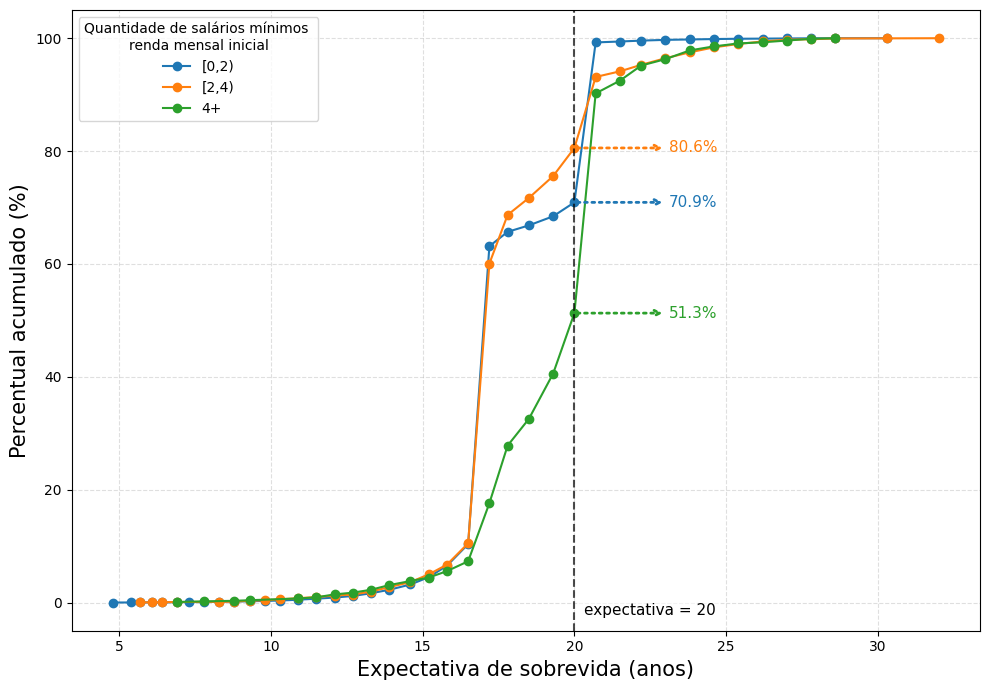

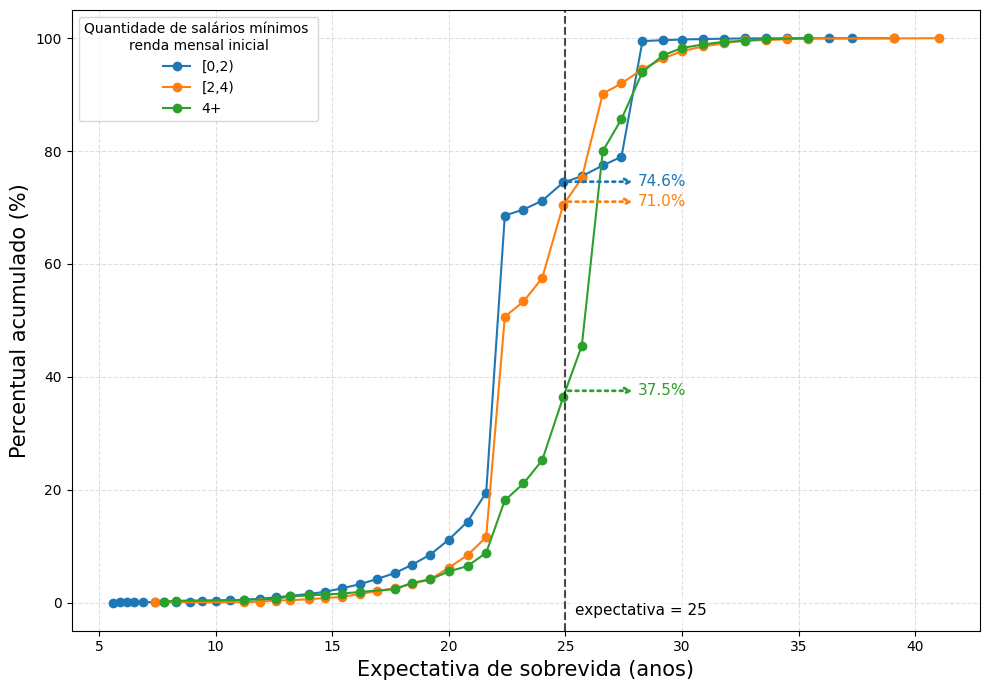

In [37]:
plot_cdf_expectativa_por_salario_por_sexo(df_aposentadorias, "Masculino",corte_eixo_x = 20)
plot_cdf_expectativa_por_salario_por_sexo(df_aposentadorias, "Feminino",corte_eixo_x = 25)


In [38]:
def plot_boxplot_idades_por_instrucao(df, instr_labels, idade_col="expectativa_sobrevida"):

    data = [df[df["grau_simplificado"] == g][idade_col].dropna() 
            for g in instr_labels]

    stats = []
    for serie in data:
        N = len(serie)
        Q1 = serie.quantile(0.25)
        Q2 = serie.quantile(0.50)
        Q3 = serie.quantile(0.75)
        stats.append((N, Q1, Q2, Q3))

    plt.figure(figsize=(13, 7))
    box = plt.boxplot(data, labels=instr_labels, patch_artist=True)

    for patch in box["boxes"]:
        patch.set(facecolor="#A0C4FF", alpha=0.8)

    plt.xlabel("Grau de Instrução (agrupado)", fontsize=14)
    plt.ylabel("Expectativa de sobrevida (anos)", fontsize=14)
    plt.grid(axis="y", linestyle="--", alpha=0.4)

    top_whiskers = [serie.max() if len(serie) else 0 for serie in data]
    y_fixed = max(top_whiskers) + 3

    for i, (N, Q1, Q2, Q3) in enumerate(stats, start=1):
        texto = (
            f"N = {N}\n"
            f"Q1 = {Q1:.1f}\n"
            f"Mediana = {Q2:.1f}\n"
            f"Q3 = {Q3:.1f}"
        )
        plt.text(
            i, y_fixed,
            texto,
            ha="center", va="bottom",
            fontsize=10
        )

    plt.ylim(top=49)
    plt.tight_layout()
    plt.savefig('figuras/box3_expectativa_escolaridade.png')
    plt.show()


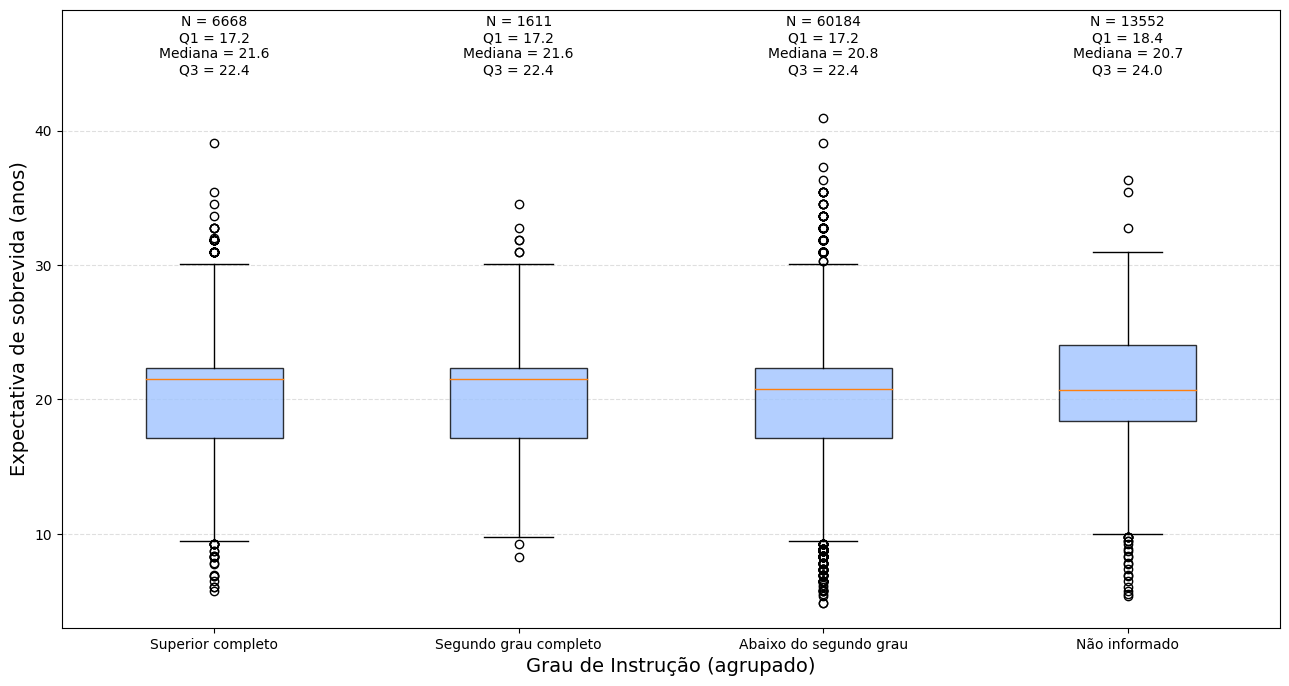

In [39]:
rotulos_grau = [
    "Superior completo",
    "Segundo grau completo",
    "Abaixo do segundo grau",
    "Não informado"
]
plot_boxplot_idades_por_instrucao(df_aposentadorias, rotulos_grau)

### Tabelas

In [40]:
df_aposentadorias['Espécie.1'].value_counts()

Espécie.1
Aposentadoria por Idade                    72253
Aposentadoria por Tempo de Contribuição     9773
Name: count, dtype: int64

In [41]:
df_aposentadorias.loc[:,
    ['Sexo.', 'Espécie.1']
].value_counts()


Sexo.      Espécie.1                              
Feminino   Aposentadoria por Idade                    41201
Masculino  Aposentadoria por Idade                    31052
Feminino   Aposentadoria por Tempo de Contribuição     5195
Masculino  Aposentadoria por Tempo de Contribuição     4578
Name: count, dtype: int64

In [42]:
df_aposentadorias['Grau Instrução'].value_counts()

Grau Instrução
5ª. a 8ª. Série Incompl. do 1º. Grau   (Ginás    18678
2º. Grau (Colegial) Completo                     17177
Não Informado                                    13556
1º. Grau (Ginasial) Completo                     13464
Superior Completo                                 6669
2º. Grau (Colegial) Incompleto                    4589
Ate 4ª. Série 1º. Grau(Primário) Incompleta       2413
Analfabeto                                        2088
4ª. Série 1ª. Grau Completa                       1781
Superior Incompleto                               1611
Name: count, dtype: int64

In [43]:
df_aposentadorias[["grau_simplificado_indice","grau_simplificado"]].value_counts(dropna=False)

grau_simplificado_indice  grau_simplificado     
0.0                       Abaixo do segundo grau    60190
NaN                       Não informado             13556
2.0                       Superior completo          6669
1.0                       Segundo grau completo      1611
Name: count, dtype: int64

In [44]:
df_aposentadorias["Região"].value_counts(dropna=False)

Região
Centro-Oeste    56408
Sudeste         15733
Sul              4770
Nordeste         3816
Norte            1299
Name: count, dtype: int64

In [45]:
contagem_grupos_renda = (
    df_aposentadorias["grupo_renda"]
    .value_counts()
    .sort_index()
)

contagem_grupos_renda

grupo_renda
[0,2)    73013
[2,4)     7407
4+        1606
Name: count, dtype: int64

In [46]:
def tabela_expectativa_por_salario(df):

    df = df.copy()
    df["expectativa_sobrevida"] = pd.to_numeric(df["expectativa_sobrevida"], errors="coerce")

    # Definindo faixas de expectativa de vida
    bins_exp = [0, 5, 10, 15, 20, 25, 30, float("inf")]
    labels_exp = ["[0,5)", "[5,10)", "[10,15)", "[15,20)", "[20,25)", "[25,30)", "30+"]

    df["faixa_expectativa"] = pd.cut(
        df["expectativa_sobrevida"],
        bins=bins_exp,
        labels=labels_exp,
        right=False
    )

    # grupos salariais
    labels_sal = ["[0,2)", "[2,4)", "4+"]

    # tabela de contagem
    contagem = (
        df
        .groupby(["faixa_expectativa", "grupo_renda"])
        .size()
        .unstack(fill_value=0)
        .reindex(index=labels_exp, columns=labels_sal, fill_value=0)
    )

    percentuais = contagem.div(contagem.sum(axis=0), axis=1) * 100
    percentuais = percentuais.round(1).astype(str) + "%"

    tabela_final = contagem.astype(str) + " (" + percentuais + ")"

    return tabela_final


tabela_expectativa_por_salario(df_aposentadorias)

grupo_renda,"[0,2)","[2,4)",4+
faixa_expectativa,,,
"[0,5)",2 (0.0%),0 (0.0%),0 (0.0%)
"[5,10)",175 (0.2%),19 (0.3%),6 (0.4%)
"[10,15)",1608 (2.2%),168 (2.3%),40 (2.5%)
"[15,20)",24373 (33.4%),3628 (49.0%),487 (30.3%)
"[20,25)",35841 (49.1%),2664 (36.0%),655 (40.8%)
"[25,30)",10852 (14.9%),823 (11.1%),399 (24.8%)
30+,151 (0.2%),105 (1.4%),19 (1.2%)


In [47]:
def resumo_salario_por_instrucao(
    df,
    instrucao_col="grau_simplificado",
    salario_col="grupo_renda",
    instr_labels=None,
    labels_sal=None,
    dropna_instrucao=True,
    dropna_salario=True
):

    df = df.copy()

    if dropna_instrucao:
        df = df[df[instrucao_col].notna()]
    if dropna_salario:
        df = df[df[salario_col].notna()]

    if instr_labels is None:
        instr_labels = sorted(df[instrucao_col].unique())

    if labels_sal is None:
        labels_sal = sorted(df[salario_col].unique())

    counts = (
        df.groupby([instrucao_col, salario_col])
          .size()
          .unstack(fill_value=0)
          .reindex(index=instr_labels, columns=labels_sal, fill_value=0)
    )

    pct = counts.div(counts.sum(axis=1), axis=0) * 100
    pct = pct.fillna(0)

    out_cols = []
    out_parts = []

    for sal in labels_sal:
        out_parts.append(counts[sal].rename(f"count_{sal}"))
        out_parts.append(pct[sal].rename(f"pct_{sal}"))
        out_cols.extend([f"count_{sal}", f"pct_{sal}"])

    result = pd.concat(out_parts, axis=1)
    result["total"] = counts.sum(axis=1)

    result = result[out_cols + ["total"]]

    return result


instr_labels = [
    "Superior completo",
    "Segundo grau completo",
    "Abaixo do segundo grau",
    "Não informado"
]

labels_sal = ["[0,2)", "[2,4)", "4+"]

resumo = resumo_salario_por_instrucao(
    df_aposentadorias,
    instrucao_col="grau_simplificado",
    salario_col="grupo_renda",
    instr_labels=instr_labels,
    labels_sal=labels_sal
)

resumo


,"count_[0,2)","pct_[0,2)","count_[2,4)","pct_[2,4)",count_4+,pct_4+,total
grau_simplificado,,,,,,,
Superior completo,3404,51.042135,2406,36.077373,859,12.880492,6669
Segundo grau completo,1048,65.052762,438,27.188082,125,7.759156,1611
Abaixo do segundo grau,55837,92.767902,3837,6.374813,516,0.857285,60190
Não informado,12724,93.862496,726,5.355562,106,0.781942,13556


### regressão

In [48]:
def rodar_regressao(df_base, target_col, feature_cols,
                    numeric_features, categorical_features):

    df = df_base[feature_cols + [target_col]].dropna()

    if df.shape[0] < 50:
        print("Registros insuficientes.")
        return None, None, None

    X = df[feature_cols]
    y = df[target_col]

    preprocessor = ColumnTransformer(
        transformers=[
            ("cat", OneHotEncoder(handle_unknown="ignore", drop="first"), categorical_features),
            ("num", "passthrough", numeric_features)
        ]
    )

    model = LinearRegression()

    pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("linreg", model)
    ])

    pipeline.fit(X, y)

    ohe = pipeline.named_steps["preprocessing"].named_transformers_["cat"]
    cat_nomes = ohe.get_feature_names_out(categorical_features)
    feature_nomes = list(cat_nomes) + numeric_features

    coefs = pipeline.named_steps["linreg"].coef_
    intercepto = pipeline.named_steps["linreg"].intercept_

    coef_df = pd.DataFrame({
        "feature": feature_nomes,
        "coeficiente": coefs
    }).sort_values("coeficiente", ascending=False)

    return pipeline, coef_df, intercepto

In [49]:
pipe_sal, coef_sal, inter_sal = rodar_regressao(
    df_base=df_aposentadorias,
    target_col="Qt SM RMI",
    feature_cols=["Espécie.1", "grau_simplificado_indice", "Sexo.",
                  "Forma Filiação", "Região"],
    numeric_features=["grau_simplificado_indice"],
    categorical_features=["Espécie.1", "Sexo.", "Forma Filiação", "Região"]
)

print(coef_sal)
print("Intercepto:", inter_sal)


                                              feature  coeficiente
0   Espécie.1_Aposentadoria por Tempo de Contribuição     0.901910
7                   Forma Filiação_Trabalhador Avulso     0.423959
12                           grau_simplificado_indice     0.421440
1                                     Sexo._Masculino     0.211050
4                            Forma Filiação_Empregado     0.169661
2                         Forma Filiação_Desempregado     0.103485
10                                     Região_Sudeste     0.061840
9                                        Região_Norte     0.041940
5                          Forma Filiação_Facultativo    -0.003221
8                                     Região_Nordeste    -0.028062
11                                         Região_Sul    -0.030209
3                            Forma Filiação_Doméstico    -0.076968
6                    Forma Filiação_Segurado Especial    -0.083344
Intercepto: 0.9876559951010783


In [50]:
ohe = pipe_sal.named_steps["preprocessing"].named_transformers_["cat"]
for nome, cats in zip(["Espécie.1", "Sexo.", "Forma Filiação", "Região"], ohe.categories_):
    print(nome, "→ baseline =", cats[0], "(dropped)")


Espécie.1 → baseline = Aposentadoria por Idade (dropped)
Sexo. → baseline = Feminino (dropped)
Forma Filiação → baseline = Autônomo (dropped)
Região → baseline = Centro-Oeste (dropped)


In [51]:
pipe_exp, coef_exp, inter_exp = rodar_regressao(
    df_base=df_aposentadorias,
    target_col="expectativa_sobrevida",
    feature_cols=["Espécie.1", "grau_simplificado_indice", "Sexo.","Qt SM RMI","Região","Forma Filiação"],
    numeric_features=["grau_simplificado_indice","Qt SM RMI"],
    categorical_features=["Espécie.1", "Sexo.", "Região","Forma Filiação"]
)

print(coef_exp)
print("Intercepto:", inter_exp)


                                              feature  coeficiente
10                   Forma Filiação_Segurado Especial     4.938196
0   Espécie.1_Aposentadoria por Tempo de Contribuição     3.236754
6                         Forma Filiação_Desempregado     0.600318
8                            Forma Filiação_Empregado     0.554357
7                            Forma Filiação_Doméstico     0.266142
13                                          Qt SM RMI     0.183638
4                                      Região_Sudeste    -0.016799
5                                          Região_Sul    -0.102853
12                           grau_simplificado_indice    -0.106499
2                                     Região_Nordeste    -0.134116
11                  Forma Filiação_Trabalhador Avulso    -0.269549
3                                        Região_Norte    -0.444811
9                          Forma Filiação_Facultativo    -0.579369
1                                     Sexo._Masculino    -5.35